# Class Three

Qiskit提供了量子程序计算的必要的模块。Quantum circuit是Qiskit的基础模块。一个基础的Qiskit任务包括两部分：Build和Run。Build允许使用不同的量子电路，代表需要解决的问题。Run允许在不同的后端编译器运行量子电路。在任务运行后，数据依据设计的输出后，收集和处理数据。

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.pulse.builder import circuit
from qiskit.result import result
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1],[0,1])
compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

circuit.draw()


Total count for 00 and 11 are: {'11': 488, '00': 512}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1


Total count for 00 and 11 are: {'00': 480, '11': 520}


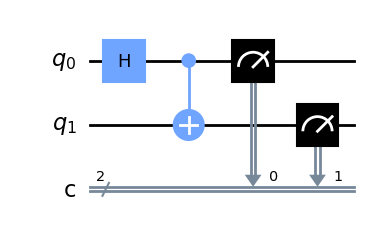

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.pulse.builder import circuit
from qiskit.result import result
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1],[0,1])
compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

circuit.draw('mpl')


Total count for 00 and 11 are: {'11': 484, '00': 516}


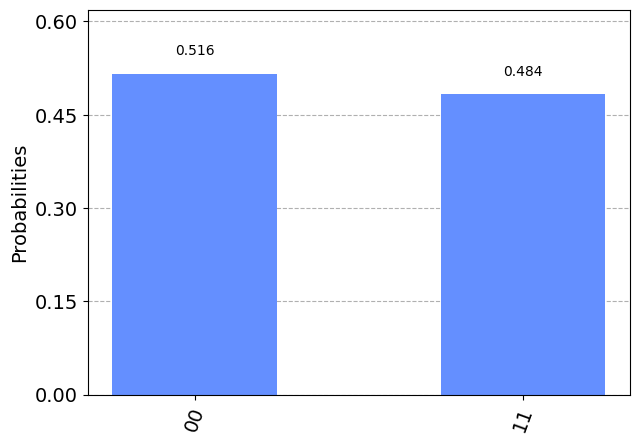

In [3]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.pulse.builder import circuit
from qiskit.result import result
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1],[0,1])
compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

plot_histogram(counts)

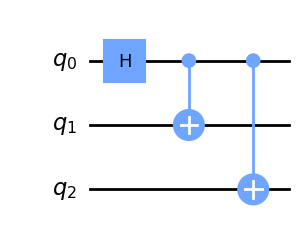

In [4]:
import numpy as np
from qiskit import QuantumCircuit

#创建包含三个量子比特的QuantumCircuit
circ = QuantumCircuit(3)

#为了创建这个量子态，首先在量子寄存器上创建三个量子比特。默认情况下，每个寄存器上的量子比特的初始状态是  。为了创建GHZ态，可以应用以下门操作：
#在qubit 0上应用一个Hadamard门  ，使量子比特进入叠加态 
#在qubit 0和qubit 1之间添加一个控制非电路操作（ cx ）
#在qubit 0和qubit 2之间添加一个控制非电路操作
#一个理想的量子计算器中，运行完电路后就会生成一个GHZ态。
circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)

#通过Qiskit的QuantumCircuit.draw()模块，可视化电路，使电路以各种形式呈现
circ.draw('mpl')

## (above)在这个电路中，量子比特按顺序排列，qubit 0在顶部，qubit 2在底部。整个电路从左到右运行，意味着比特从左往右依次通过每个门。


In [5]:
from qiskit.quantum_info import Statevector
# 使用from_int将模拟器的初始状态设置为基态
state = Statevector.from_int(0,2**3)
# 将状态包含进量子电路里
state = state.evolve(circ)
# 使用latex绘制电路
state.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
state = Statevector.from_int(0,2**3)
state = state.evolve(circ)
array_to_latex(state)

<IPython.core.display.Latex object>

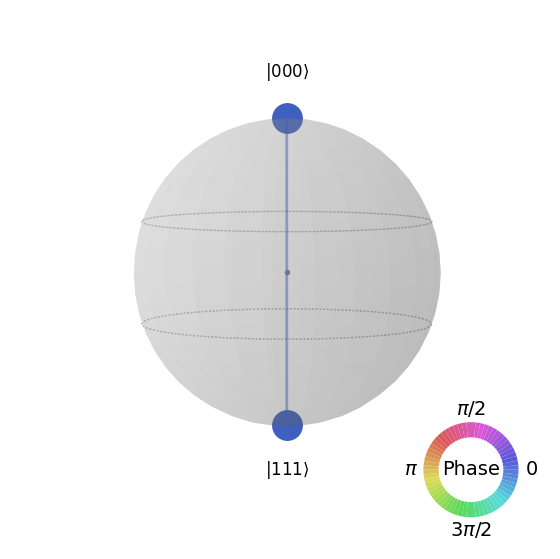

In [7]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

circ = QuantumCircuit(3)

circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)

state = Statevector.from_int(0,2**3)
state = state.evolve(circ)
plot_state_qsphere(state)
#布洛赫球的形式

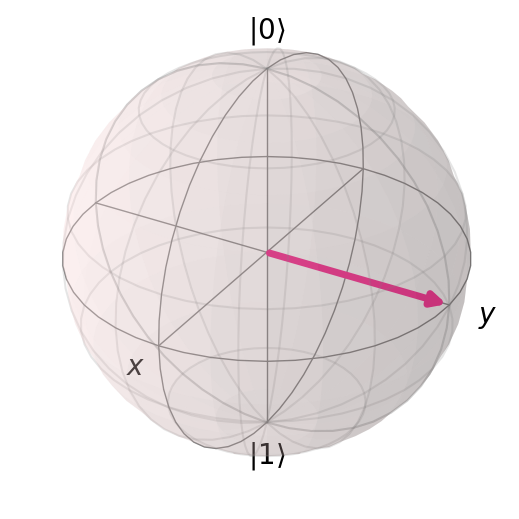

In [11]:
#这里的布洛赫向量是基于泡利算符的分解
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0, 1, 0])

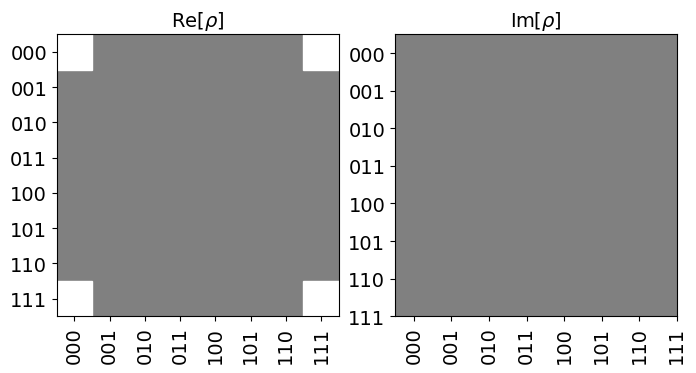

In [9]:
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

circ = QuantumCircuit(3)

circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)

state = Statevector.from_int(0,2**3)
state = state.evolve(circ)
state.draw('hinton')
# Hinton图可用于可视化二维数组的值（例如权重矩阵）：
# 正值和负值分别由白色和黑色的方块表示，每个方块的大小表示每个值的大小。

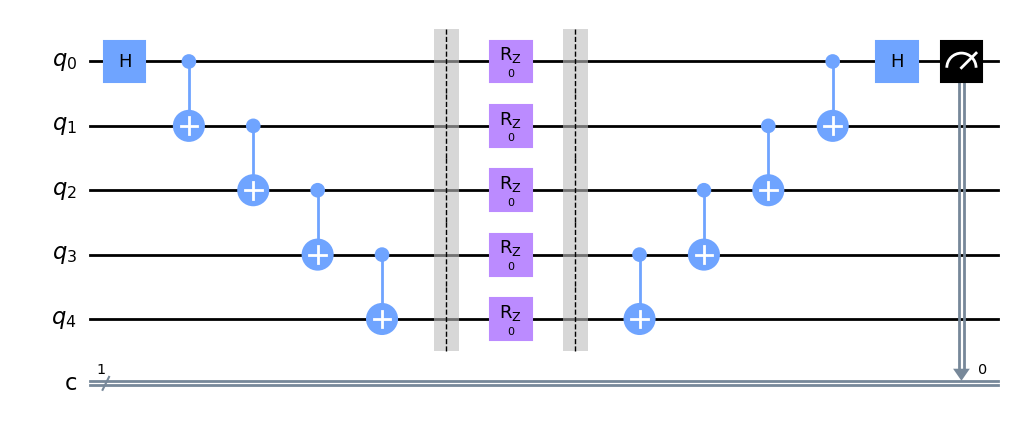

In [10]:
from qiskit.circuit import Parameter
theta = Parameter('0')
n=5
qc=QuantumCircuit(5,1)
qc.h(0)
for i in range(n-1):
    qc.cx(i,i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i,i+1)
    
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')